In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(500, 2)
(1000, 2) (1000, 1)


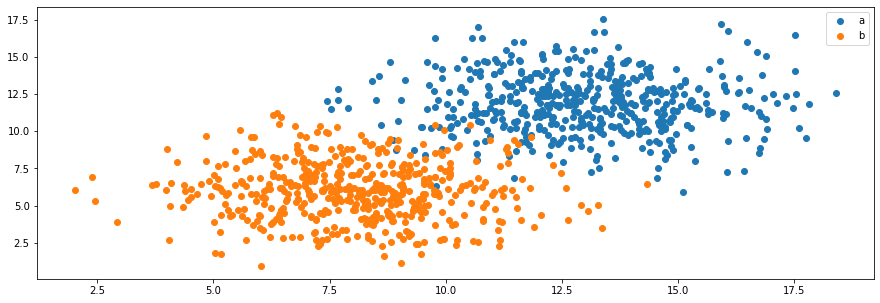

In [116]:
n_pts = 500
np.random.seed(0)

# Xa normalde (2,500) dönüyor T ile 500 ,2 dönüyor !!!
Xa = np.array([np.random.normal(13,2,n_pts),
               np.random.normal(12,2,n_pts)]).T

Xb = np.array([np.random.normal(8,2,n_pts),
               np.random.normal(6,2,n_pts)]).T

X = np.vstack((Xa,Xb))
y = np.matrix(np.append(np.zeros(n_pts),np.ones(n_pts))).T

plt.figure(figsize = (15,5))
plt.scatter(X[:n_pts,0],X[:n_pts,1],label = "a")
plt.scatter(X[n_pts:,0],X[n_pts:,1],label = "b")
plt.legend(loc = "best")

print(X.shape,y.shape)

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 1, input_shape = (2,) ,activation = "sigmoid"))

adam = tf.keras.optimizers.Adam(learning_rate =0.1 )

model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 20 iterationda bitirdi !!
h= model.fit(X, y, verbose = 1, batch_size = 50, epochs=500,shuffle = True)

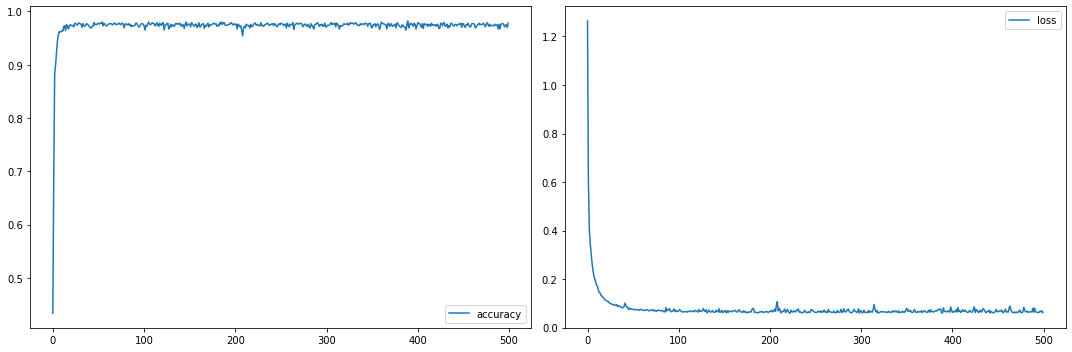

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(h.history["accuracy"],label = "accuracy")
plt.legend(loc = "best")

plt.subplot(122)
plt.plot(h.history["loss"],label = "loss")
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

In [109]:
def plot_decision_boundry(X,y,model):
    
    x_span = np.linspace(min(X[:,0]) -1 , max(X[:,0]) + 1, 3)
    y_span = np.linspace(min(X[:,1]) -1,  max(X[:,1]) + 1, 3)

    print("x_span,y_span")
    print()
    print(x_span)
    print(x_span.shape)
    print(y_span)
    print(y_span.shape)
    print()

    xx, yy = np.meshgrid(x_span,y_span)

    print("xx,yy")
    print()
    print(xx)
    print(xx.shape)
    print()
    print(yy)
    print(yy.shape)

    xx_,yy_ = xx.ravel(),yy.ravel()

    print()
    print("xx_,yy_")
    print()
    print(xx_)
    print()
    print(yy_)
    print()

    grid = np.c_[xx_,yy_]
    
    print("Grid")
    print()
    print(grid)

In [110]:
plot_decision_boundry(X,y,model)

x_span,y_span

[ 1.01077428 10.20161119 19.39244811]
(3,)
[-0.08247762  9.21811631 18.51871023]
(3,)

xx,yy

[[ 1.01077428 10.20161119 19.39244811]
 [ 1.01077428 10.20161119 19.39244811]
 [ 1.01077428 10.20161119 19.39244811]]
(3, 3)

[[-0.08247762 -0.08247762 -0.08247762]
 [ 9.21811631  9.21811631  9.21811631]
 [18.51871023 18.51871023 18.51871023]]
(3, 3)

xx_,yy_

[ 1.01077428 10.20161119 19.39244811  1.01077428 10.20161119 19.39244811
  1.01077428 10.20161119 19.39244811]

[-0.08247762 -0.08247762 -0.08247762  9.21811631  9.21811631  9.21811631
 18.51871023 18.51871023 18.51871023]

Grid

[[ 1.01077428 -0.08247762]
 [10.20161119 -0.08247762]
 [19.39244811 -0.08247762]
 [ 1.01077428  9.21811631]
 [10.20161119  9.21811631]
 [19.39244811  9.21811631]
 [ 1.01077428 18.51871023]
 [10.20161119 18.51871023]
 [19.39244811 18.51871023]]


In [101]:
def plot_decision_boundry(X,y,model):
    
    x_span = np.linspace(min(X[:,0]) -1 , max(X[:,0]) + 1, 50) # (50,)
    y_span = np.linspace(min(X[:,1]) -1,  max(X[:,1]) + 1, 50) # (50,)

    # Şimdi burda xx için aynı satırı 50,50 olarak üretirken
    # yy için her değeri her satır eşsiz olucak şekilde türetti yani tek değer var yukarda anlayabilirsin
    xx, yy = np.meshgrid(x_span,y_span) # (50,50),(50,50)
 
    xx_,yy_ = xx.ravel(),yy.ravel() # ( 2500, )

    grid = np.c_[xx_,yy_] # ( 2500, 2)

    pred_func = model.predict(grid) # (2500,1)

    z = pred_func.reshape(xx.shape) # ( 50,50)

    plt.contourf(xx,yy,z)

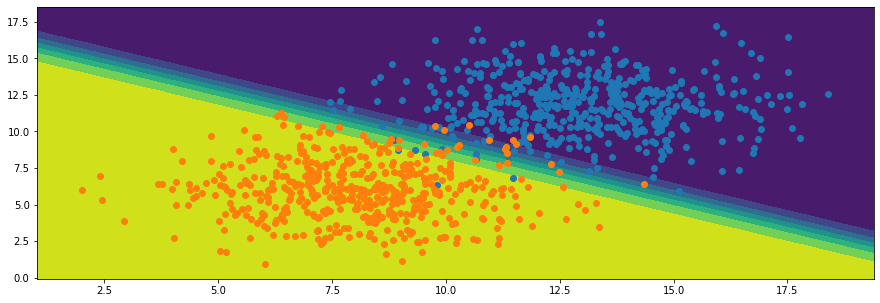

In [102]:
plt.figure(figsize = (15,5))

plot_decision_boundry(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

plt.show()

Prediction is :  0.99999034


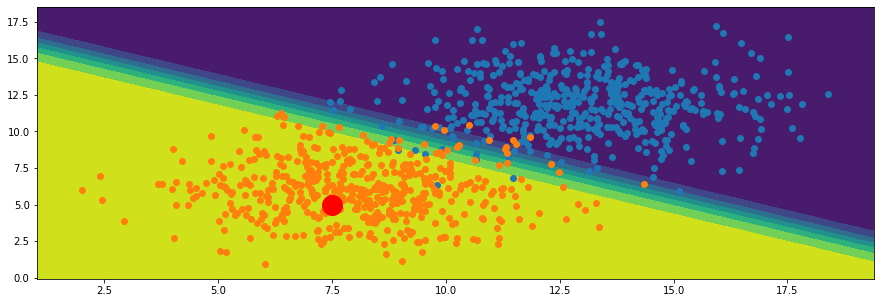

In [104]:
plt.figure(figsize = (15,5))

plot_decision_boundry(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
x = 7.5
y = 5

point = np.array([[x,y]])
pred = model.predict(point)
plt.plot([x],[y],marker = "o",markersize = 20, color = "red")
print("Prediction is : ", pred[0][0])

plt.show()